# SUPER STORE SALES ANALYSIS

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the csv file

df = pd.read_csv(r"C:\Users\kalpak\OneDrive\Desktop\CSVs\Superstore data.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# general overview of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
# calculating the no. of null values

null_count = df["Postal Code"].isnull().sum()
print(null_count)

11


In [5]:
# filling 0 to the empty coulumn

df["Postal Code"].fillna(0,inplace=True)

# changing from float to integer
df["Postal Code"] = df["Postal Code"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# get overall statistics about the dataset

df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# Data Cleaning

### Checking for duplicates

In [9]:
# using conditional statements

if df.duplicated().sum() >0:
    print("Duplicates are present")
else:
    print("No duplicates exist")

No duplicates exist


# df.duplicated()

In [11]:
df.duplicated(keep=False).sum()

0

# Exploratory Data Analysis

## Customer Analysis

### Customer Segmentation

In [12]:
# Types of customers

types_of_customers = df["Segment"].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [14]:
# numbers of customers in each segment

number_of_customers = df["Segment"].value_counts().reset_index()

number_of_customers = number_of_customers.rename(columns={"index":"Customer Type","Segment":"Total Customers"})

print(number_of_customers)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


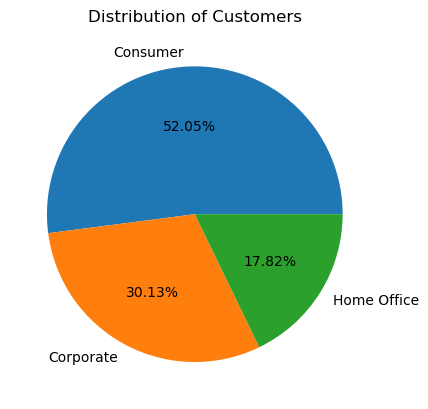

In [16]:
# Plotting a pie chart

plt.pie(number_of_customers['Total Customers'],labels=number_of_customers['Customer Type'],autopct='%1.2f%%')

# set pie chart labels
plt.title("Distribution of Customers")

plt.show()

In [17]:
sales_per_category = df.groupby('Segment')['Sales'].sum().reset_index()

sales_per_category = sales_per_category.rename(columns={'Segment':"Customer Type",'Sales':'Total Sales'})

print(sales_per_category)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


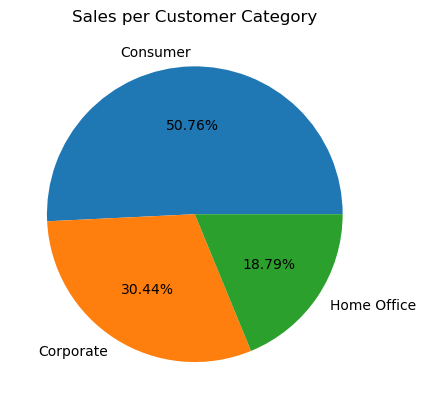

In [18]:
# Plotting a pie chart

plt.pie(sales_per_category['Total Sales'],labels=sales_per_category['Customer Type'],autopct='%1.2f%%')

# set pie chart labels
plt.title("Sales per Customer Category")

plt.show()

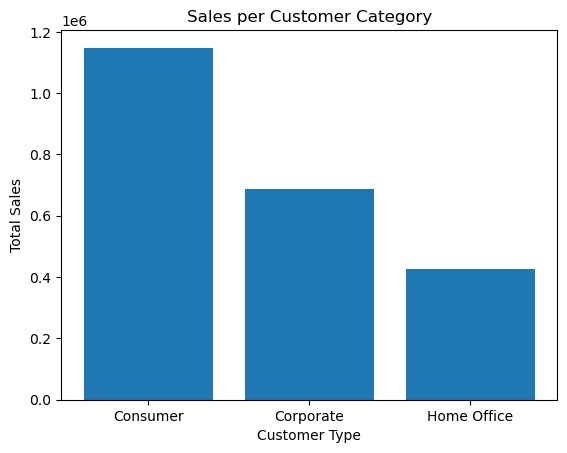

In [19]:
# Bar Graph

plt.bar(sales_per_category['Customer Type'],sales_per_category['Total Sales'])
plt.title("Sales per Customer Category")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")

plt.show()

## Customer Loyalty

In [20]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [26]:
# Grouping data according to: Customer ID,Customer Name, Segment and calculate freq. of the orders


customers_order_freq = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()

# Rename the order ID column
customers_order_freq.rename(columns={'Order ID':"Total Orders"},inplace=True)

# Identify repeat customers
repeat_customers = customers_order_freq[customers_order_freq['Total Orders']>=1]

# Sort repeat customers in desc order
sorted_repeat_customers = repeat_customers.sort_values(by='Total Orders',ascending=False)

print(sorted_repeat_customers.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    CK-12205  Chloris Kastensmidt     Consumer            32
5    SV-20365          Seth Vernon     Consumer            32
6    JD-15895     Jonathan Doherty    Corporate            32
7    AP-10915       Arthur Prichep     Consumer            31
8    ZC-21910     Zuschuss Carroll     Consumer            31
9    EP-13915           Emily Phan     Consumer            31


In [28]:
# Grouping data based on: Customer ID,Customer Name, Sales

customer_sales = df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()

top_spendors = customer_sales.sort_values(by='Sales',ascending=False)

print(top_spendors.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


### Mode of shipping

In [29]:
# sorting unique values in the ship mode column into a new series

type_of_shipping = df["Ship Mode"].unique()

print(type_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [30]:
# Frequency use of shipping methods

shipping_mode = df["Ship Mode"].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns={'index':'Mode of Shipment','Ship Mode':'Use Frequency'})

print(shipping_mode)

  Mode of Shipment  Use Frequency
0   Standard Class           5859
1     Second Class           1902
2      First Class           1501
3         Same Day            538


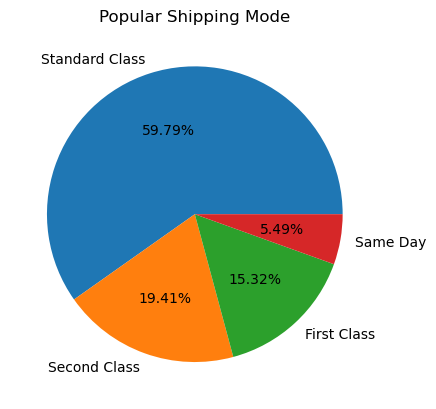

In [31]:
# Plotting a pie chart

plt.pie(shipping_mode['Use Frequency'],labels=shipping_mode['Mode of Shipment'],autopct='%1.2f%%')

# set pie chart labels
plt.title("Popular Shipping Mode")

plt.show()

### Graphical Analysis

In [35]:
# customers by state

state = df["State"].value_counts().reset_index()
state = state.rename(columns={'index':'State','State':'Number of Customers'})

print(state.head(8))

          State  Number of Customers
0    California                 1946
1      New York                 1097
2         Texas                  973
3  Pennsylvania                  582
4    Washington                  504
5      Illinois                  483
6          Ohio                  454
7       Florida                  373


In [36]:
# customers by city

city = df["City"].value_counts().reset_index()
city = city.rename(columns={'index':'City','City':'Number of Customers'})

print(city.head(8))

            City  Number of Customers
0  New York City                  891
1    Los Angeles                  728
2   Philadelphia                  532
3  San Francisco                  500
4        Seattle                  426
5        Houston                  374
6        Chicago                  308
7       Columbus                  221


In [38]:
# Sales per state

# grouping state and sales
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()

# sorting starting from highest state
top_state_sales = state_sales.sort_values(by='Sales',ascending=False)

print(top_state_sales.head(10).reset_index(drop=True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [40]:
# Sales per city

# grouping state and sales
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()

# sorting starting from highest state
top_city_sales = city_sales.sort_values(by='Sales',ascending=False)

print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


## Product Analysis

In [42]:
# types of product categories

product_category = df['Category'].unique()
print(product_category)

['Furniture' 'Office Supplies' 'Technology']


In [44]:
# group data by product category

subcategory_count = df.groupby('Category')["Sub-Category"].nunique().reset_index()

# sort by ascending order
subcategory_count = subcategory_count.sort_values(by='Sub-Category',ascending=False)

print(subcategory_count.reset_index(drop=True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


In [47]:
# Sales per each category

category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()

# sort in descending order
category_sales = category_sales.sort_values(by='Sales',ascending=False)

print(category_sales.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


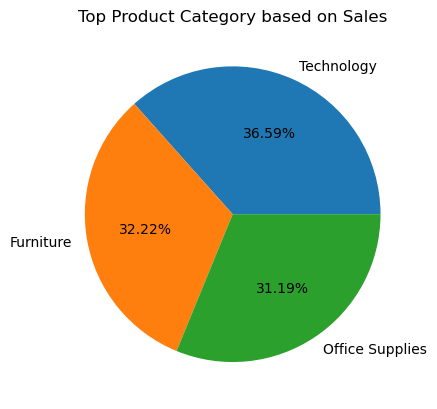

In [48]:
# Plotting a pie chart

plt.pie(category_sales['Sales'],labels=category_sales['Category'],autopct='%1.2f%%')

# set pie chart labels
plt.title("Top Product Category based on Sales")

plt.show()

In [50]:
# group data by product sub-category vs sales

pdt_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

# Sorting in descending order
top_pdt_subcategory = pdt_subcategory.sort_values(by='Sales',ascending=False)

print(top_pdt_subcategory.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


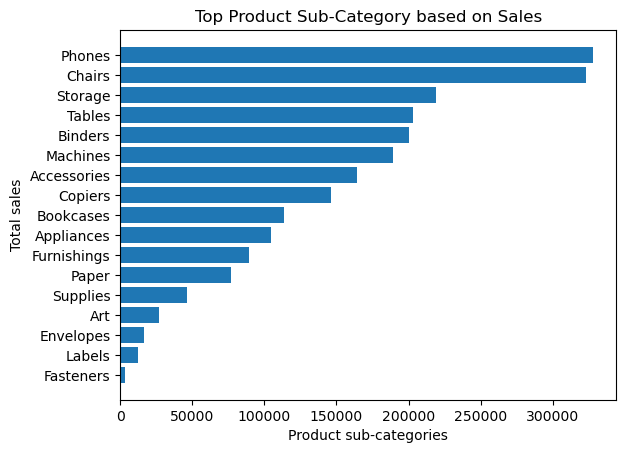

In [53]:
top_pdt_subcategory = pdt_subcategory.sort_values(by='Sales',ascending=True)

# plotting the horizontal bar graph

plt.barh(top_pdt_subcategory['Sub-Category'],top_pdt_subcategory['Sales'])

plt.title("Top Product Sub-Category based on Sales")
plt.xlabel("Product sub-categories")
plt.ylabel("Total sales")

plt.show()

## Sales

In [54]:
# convert order date to date time format

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)

# grouping by year and summing the sales per year

yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

# setting new index and renaming the columns

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date':'Year','Sales':'Total Sales'})

print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


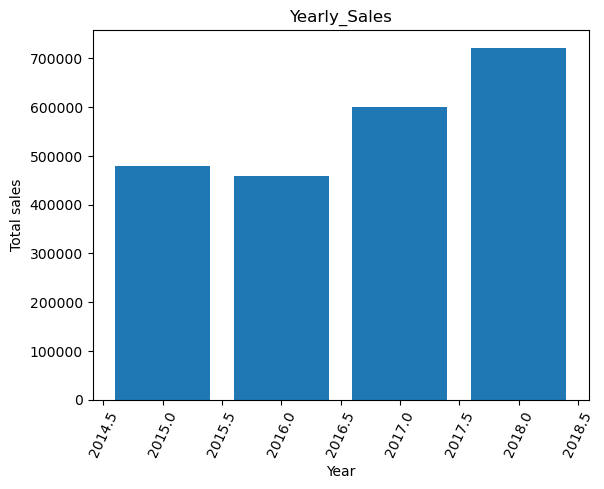

In [56]:
# plotting the bar graph

plt.bar(yearly_sales['Year'],yearly_sales['Total Sales'])

plt.title("Yearly_Sales")
plt.xlabel("Year")
plt.ylabel("Total sales")
plt.xticks(rotation=65)

plt.show()

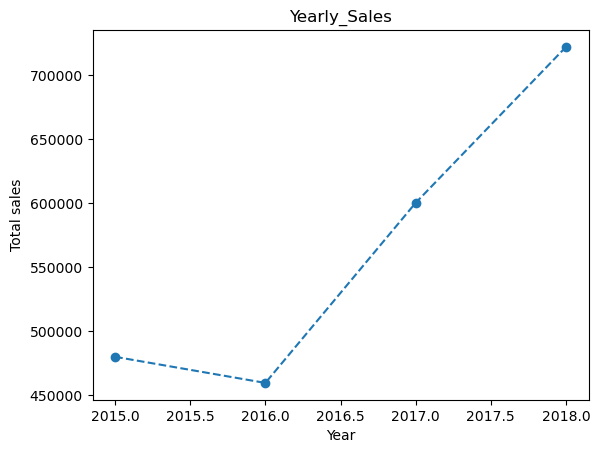

In [60]:
# plotting the line graph

plt.plot(yearly_sales['Year'],yearly_sales['Total Sales'],marker='o',linestyle='--')

plt.title("Yearly_Sales")
plt.xlabel("Year")
plt.ylabel("Total sales")


plt.show()

## Quarterly Sales

In [64]:
# convert order date to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)

# Filter data according to year

year_sales = df[df['Order Date'].dt.year == 2018]

# calculate quarterly sales for year 2018

quarterly_sales = year_sales.resample('Q',on='Order Date')['Sales'].sum()

quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date':'Quarter','Sales':'Total Sales'})

print("This are the Quarterly sales for 2018")
print(quarterly_sales)

This are the Quarterly sales for 2018
     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


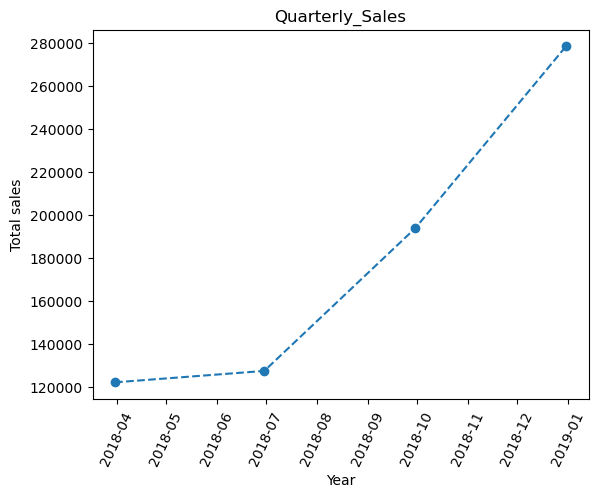

In [69]:
# plotting the line graph

plt.plot(quarterly_sales['Quarter'],quarterly_sales['Total Sales'],marker='o',linestyle='--')

plt.title("Quarterly_Sales")
plt.xlabel("Year")
plt.ylabel("Total sales")
plt.xticks(rotation=65)

plt.show()

## Monthly sales trend for a year

In [68]:
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)

# Filter data according to year

year_sales = df[df['Order Date'].dt.year == 2018]

# calculate monthly sales for year 2018

monthly_sales = year_sales.resample('M',on='Order Date')['Sales'].sum()

# rename columns
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month','Sales':'Total Monthly Sales'})

print("This are the Monthly sales for 2018")
print(monthly_sales)

This are the Monthly sales for 2018
        Month  Total Monthly Sales
0  2018-01-31           43476.4740
1  2018-02-28           19920.9974
2  2018-03-31           58863.4128
3  2018-04-30           35541.9101
4  2018-05-31           43825.9822
5  2018-06-30           48190.7277
6  2018-07-31           44825.1040
7  2018-08-31           62837.8480
8  2018-09-30           86152.8880
9  2018-10-31           77448.1312
10 2018-11-30          117938.1550
11 2018-12-31           83030.3888


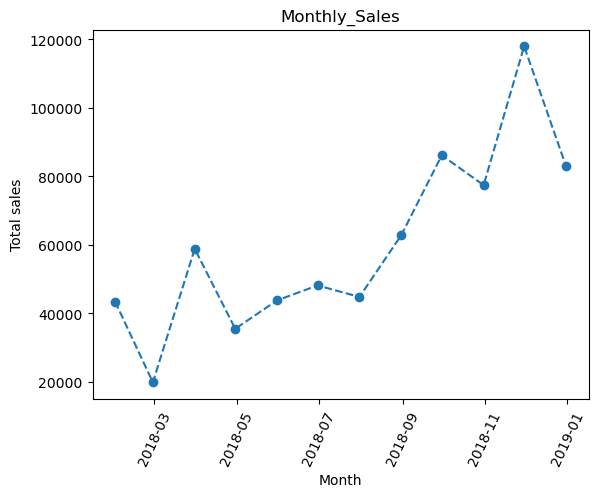

In [72]:
# plotting the line graph

plt.plot(monthly_sales['Month'],monthly_sales['Total Monthly Sales'],marker='o',linestyle='--')

plt.title("Monthly_Sales")
plt.xlabel("Month")
plt.ylabel("Total sales")
plt.xticks(rotation=65)

plt.show()